# TITANS - Trajectory Inference Through Ancestral Search

### TITANS was built to answer the question: How does a blood stem cell turn into a mature blood cell?

### However the algorithm behind TITANS can be applied to any high-dimensional dataset where the question is: What is the most likely trajectory between different populations in my data?

### In short, TITANS does three things:

### 1) Locates the Root Space (i.e. the starting population) for the trajectory based on user-defined features

### 2) Locates the possible endpoints of the trajectories starting at the Root Space in an unsupervised manner

### 3) Iteratively traces back from each endpoint to the Root Space by searching for highly aligned samples

### TITANS can uncover highly complex, branching trajectories and structure that cannot be observed with normal dimensionality reduction algorithms.


### Here I will illustrate how TITANS works on a dataset of blood cells. No biology knowledge is required to understand this notebook!

## The Data

In [1]:
# general imports
import scanpy.api as scanpy
scanpy.settings.verbosity = 0
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.colors import LinearSegmentedColormap

# import TITANS
import titans_OOP as titans

The data we will look at is an example of a **single-cell RNA sequencing (scRNA-seq) dataset**. It contains **21836 blood cells (samples)**, each of which have count values for **5005 genes (features)**. These count values correspond to how active that gene is in a given cell. 

Scanpy (**Single-Cell Analysis in Python**) is a project designed to provide a data class and associated methods for performing basic analysis on biological data. 

In [2]:
# read in data
data = scanpy.read('./titans_test_data_preprocessed_w_diffmapevals.h5')

## Visualising the data

We can visualise the data on a *Force Directed Graph*. I have previously calculated a **k-nearest neighbour** graph for the datset, and **embedded it in two dimensions** for visualisation using the **Force Atlas 2** algorithm. This will allows us to visualise what TITANS is doing.

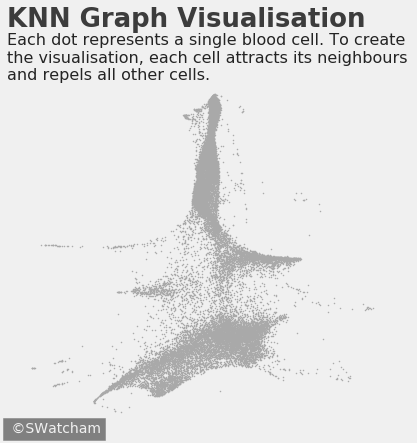

In [3]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x=data.obsm['graph_coords'][:,0], y=data.obsm['graph_coords'][:,1], s=1, c='#A9A9A9')
ax.set_xticks([])
ax.set_yticks([])
ax.text(x=-12000, y=24000, s='KNN Graph Visualisation', fontsize=26, weight='bold', alpha=0.75)
ax.text(x=-12000, y=18000, s='''Each dot represents a single blood cell. To create 
the visualisation, each cell attracts its neighbours
and repels all other cells.''', fontsize=16, alpha=0.85)
ax.text(x=-12000, y=-22000, s=' ©SWatcham', color='#f0f0f0', backgroundcolor='grey')
plt.show()

Each dot here is a single cell (sample). **But it's not very illuminating**! Let's add the expression of some key genes (features) which **we know are associated with certain types of blood cell**.


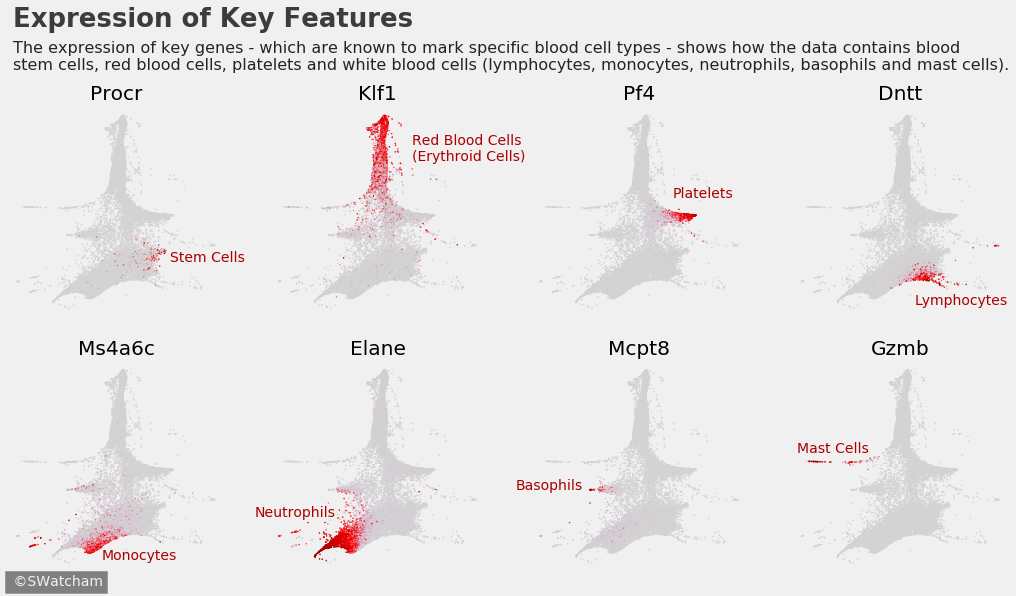

In [4]:
#choose some genes to show on the graph
genes = ['Procr', 'Klf1', 'Pf4', 'Dntt','Ms4a6c', 'Elane', 'Mcpt8', 'Gzmb']

#nice colormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred'])

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16,8))

#plot counts for each gene 
for i, ax in enumerate(axes.flat):
    gene = genes[i]
    gene_index = np.where(data.var['gene_names'] == gene)[0][0] 
    ax.scatter(x=data.obsm['graph_coords'][:,0], y=data.obsm['graph_coords'][:,1], 
               s=1, c=data.X[:,gene_index], cmap=cmap)
    ax.set_title(gene)
    ax.set_xticks([])
    ax.set_yticks([])
    
#add title, signature, annotation etc   
axes.flat[0].text(x=-11000, y=33000, s='Expression of Key Features', fontsize=26, weight='bold', alpha=0.75)   
axes.flat[0].text(x=-11000, y=25000, s='''The expression of key genes - which are known to mark specific blood cell types - shows how the data contains blood 
stem cells, red blood cells, platelets and white blood cells (lymphocytes, monocytes, neutrophils, basophils and mast cells).''', fontsize=16, alpha=0.85)   
axes.flat[0].text(x=5000,y=-11000, s='Stem Cells', color='#AA0000')
axes.flat[1].text(x=3000,y=11000, s='Red Blood Cells', color='#AA0000')
axes.flat[1].text(x=3000,y=8000, s='(Erythroid Cells)', color='#AA0000')
axes.flat[2].text(x=3000,y=1000, s='Platelets', color='#AA0000')
axes.flat[3].text(x=1000,y=-19000, s='Lymphocytes', color='#AA0000')
axes.flat[4].text(x=-2000,y=-19000, s='Monocytes', color='#AA0000')
axes.flat[5].text(x=-13000,y=-11000, s='Neutrophils', color='#AA0000')
axes.flat[6].text(x=-13000,y=-6000, s='Basophils', color='#AA0000')
axes.flat[7].text(x=-11000,y=1000, s='Mast Cells', color='#AA0000')
axes.flat[5].text(x=-38000, y=-24000, s=' ©SWatcham', color='#f0f0f0', backgroundcolor='grey')
plt.show()

## Running TITANS 

### Remember, in basic terms, TITANS does three things: 

### (1) Find the location of the most primitive, immature samples in the high-dimensional space of the data (e.g. the stem cells!)


Let's do this now. First, let's create a TITANS object:

In [5]:
titans_object = titans.Titans(data, 'X_diffmap')

The only input TITANS requires is:
- A list of features associated with the root space in the data. 

Here I use a list of genes from Wilson et. al. 2015. Using these, TITANS locates the root space in the high dimensional data.

In [6]:
input_genes = ['Procr', 'Pdzk1ip1', 'Ltb', 'Mllt3', 'Gimap1', 'Gimap6', 'Limd2', 'Trim47', 'Neil2', 'Vwf',
            'Pde1b', 'Neo1', 'Sqrd1', 'Sult1a1', 'Cd82', 'Ramp2', 'Ubl3', 'Cdkn1c', 'Fgfr3', 'Cldn10',
            'Ptpn14', 'Mettl7a1', 'Smtnl1', 'Ctsf', 'Gstm1', 'Sox18', 'Fads3','Ly6a', 'Ifitm1']

titans_object.find_root(data, input_genes)


 Scoring each cell using the genes provided...

 Finding the root space using the 20 highest scoring root cells...

 For the chosen representation, the root vector is located at <Titant Object>.origin

 The respresentation is now being shifted such that the root vector is placed at the origin...

 The new representation of the dataset can be found at <Titans Object>.shifted_rep


We can **visualise the root space** by using TITANS in-built plotting functions:

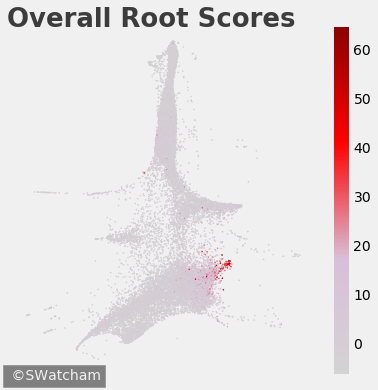

In [7]:
ax = titans.plotting.scatter(data.obsm['graph_coords'], titans_object.root_scores, cmap=cmap)
ax.text(x=-12000, y=18000, s='Overall Root Scores', fontsize=26, weight='bold', alpha=0.75)
ax.text(x=-12000, y=-22000, s=' ©SWatcham', color='#f0f0f0', backgroundcolor='grey')
plt.show()

There is a **clear area with the highest scores**, which hopefully is where the blood stem cells are. It is encouraging that this area is close to the area we thought the stem cells were in earlier, when we **used only a single feature**.

### (2) Find the location(s) of the most developed, mature samples in the data (e.g. the 7 mature blood cell types above) 

To **find the possible endpoints** of a trajectory originating in the root space, we need to **add some directionality** to our data. This is done using the concept of **pseudotime**, which calculates a distance between each cell and the root space. Since this distance must (over large scales) **increase along a trajectory**, it can be used to provide directionality to the data. 

In [8]:
# add directionality to data
data.uns['iroot'] = int(titans_object.root_scores_sorted[0][0])
scanpy.tl.dpt(data)

# locate the endpoints
titans_object.find_endpoints(data)

Attempting to locate endpoints...

 Calculating distance matrix - for large datasets this will take some time...

 Smoothing pseudotime values (smoothed values are used only to find endpoints)...

 Smoothing complete...

 The number of located endpoints is: 19

 Endpoints are stored at <Titans Object>.endpoints...


Now let's **visualise the endpoints**:

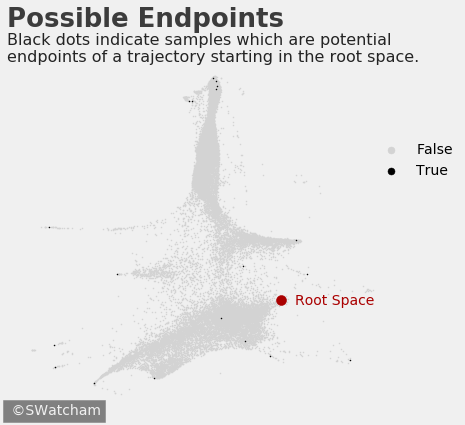

In [9]:
ax = titans.plotting.scatter(data.obsm['graph_coords'], titans_object.endpoints)
ax.text(x=-12000, y=22000, s='Possible Endpoints', fontsize=26, weight='bold', alpha=0.75)
ax.text(x=-12000, y=18000, s='''Black dots indicate samples which are potential
endpoints of a trajectory starting in the root space.''', fontsize=16, alpha=0.85)
ax.scatter(4200,-9000, color='#AA0000', s=100)
ax.text(5000,-9500,s='Root Space', color='#AA0000')
ax.text(x=-12000, y=-22000, s=' ©SWatcham', color='#f0f0f0', backgroundcolor='grey')
plt.show()

Here I choose **seven of the located endpoints** based on my knowledge of the system, and label them accordingly. **In an unsupervised setting**, trajectories for all of the located endpoints could be calculated.

In [10]:
chosen_endpoints = [14639, 11230,5362,9470,19944,10784,17086]
trajectory_labels = ['erythroid','platelet','mast','basophil','neutrophil','monocyte','lymphoid']

### (3) For each endpoint found in (2), iteratively trace back towards the most primitive space by finding highly aligned samples at each iteration.

In [11]:
%%time
titans_object.calculate_trajectory(data, chosen_endpoints[0], trajectory_labels[0], thresh=.998, look_back=10)
titans_object.calculate_trajectory(data, chosen_endpoints[1], trajectory_labels[1], thresh=.998, look_back=2)
titans_object.calculate_trajectory(data, chosen_endpoints[2], trajectory_labels[2], thresh=.998, look_back=2)
titans_object.calculate_trajectory(data, chosen_endpoints[3], trajectory_labels[3], thresh=.998, look_back=2)
titans_object.calculate_trajectory(data, chosen_endpoints[4], trajectory_labels[4], thresh=.998, look_back=2)
titans_object.calculate_trajectory(data, chosen_endpoints[5], trajectory_labels[5], thresh=.998, look_back=2)
titans_object.calculate_trajectory(data, chosen_endpoints[6], trajectory_labels[6], thresh=.996, look_back=2)


 Starting trajectory inference of erythroid trajectory with cell index 14639...
Trajectory inference has finished. The trajectory contains 10500 cells.
 The calculated trajectory can be found at <Titans Object>.erythroid_trajectory.

 Starting trajectory inference of platelet trajectory with cell index 11230...
Trajectory inference has finished. The trajectory contains 2148 cells.
 The calculated trajectory can be found at <Titans Object>.platelet_trajectory.

 Starting trajectory inference of mast trajectory with cell index 5362...
Trajectory inference has finished. The trajectory contains 2523 cells.
 The calculated trajectory can be found at <Titans Object>.mast_trajectory.

 Starting trajectory inference of basophil trajectory with cell index 9470...
Trajectory inference has finished. The trajectory contains 2608 cells.
 The calculated trajectory can be found at <Titans Object>.basophil_trajectory.

 Starting trajectory inference of neutrophil trajectory with cell index 19944...
T

Calculating all 7 trajectories **takes only 4 minutes**. Now we can **visualise these trajectories**!

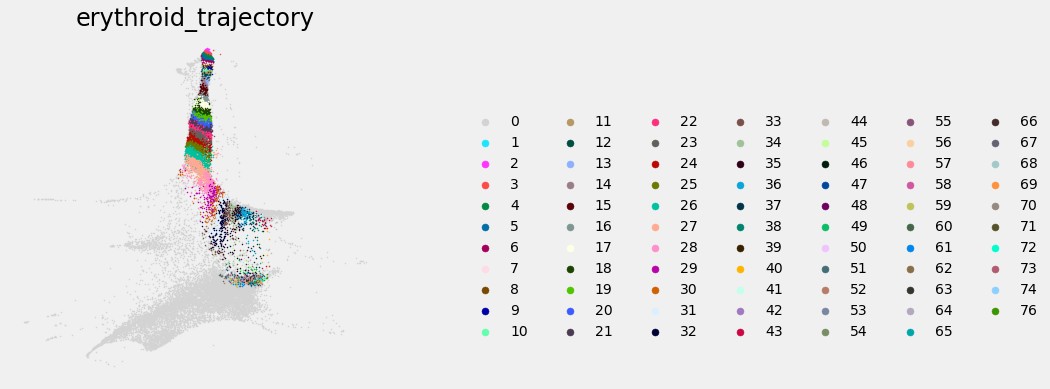

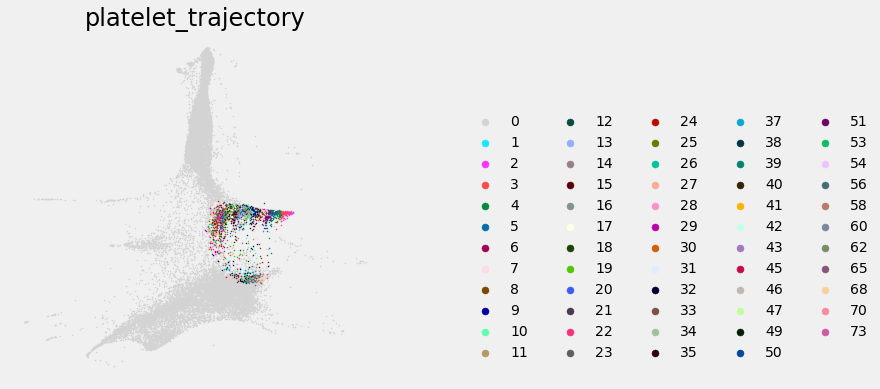

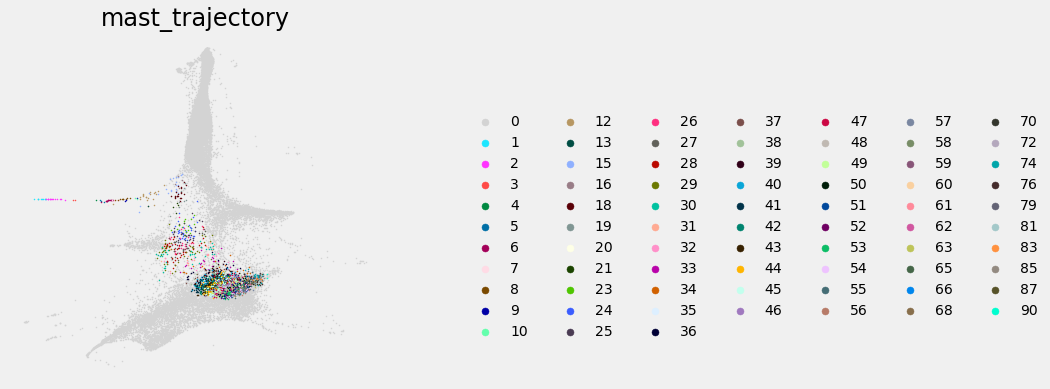

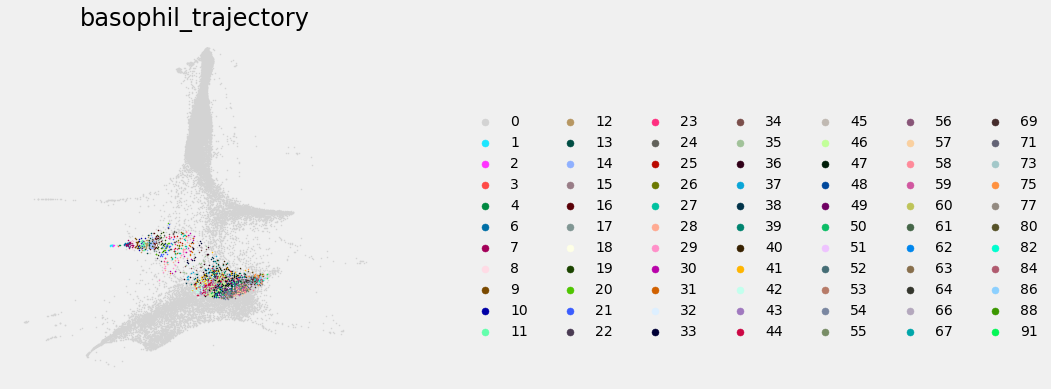

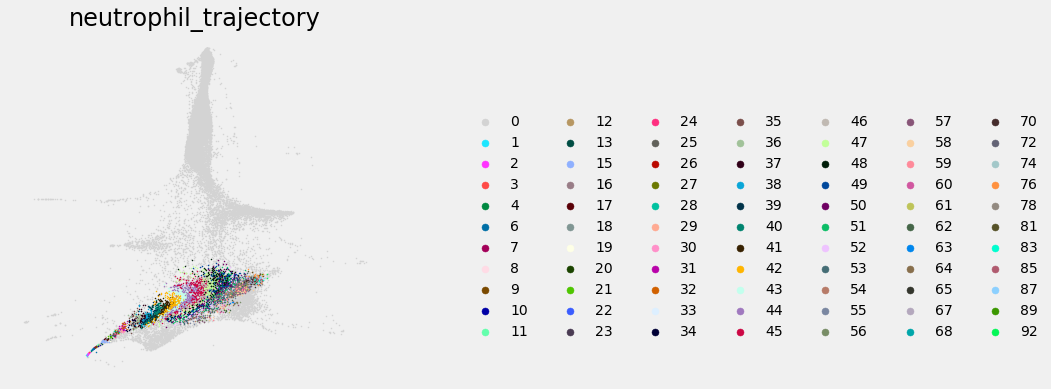

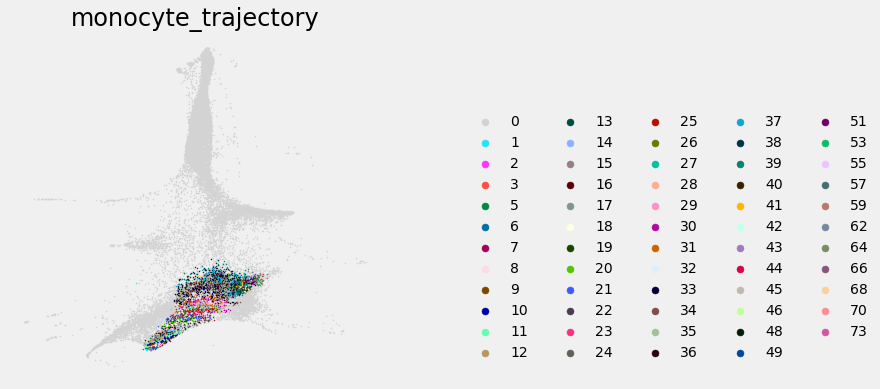

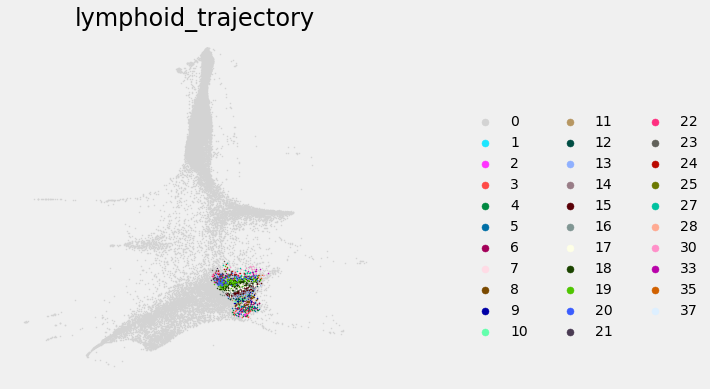

In [12]:
traj_list = ['erythroid_trajectory', 'platelet_trajectory', 'mast_trajectory', 'basophil_trajectory',
             'neutrophil_trajectory', 'monocyte_trajectory', 'lymphoid_trajectory']
for item in traj_list:
    titans.plotting.visualise_trajectory(data.obsm['graph_coords'], titans_object, item)

Here we have some very **interesting biological results**, which won't be analysed in detail here. You can see how each trajectory **starts from an endpoint** and **ends in the root space**. Let's make things a bit clearer by reducing each trajectory to ~20 clusters, so that we can see exactly **how the trajectories are moving through the data**.

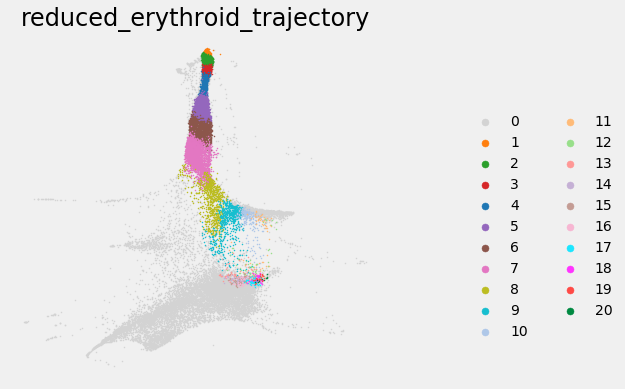

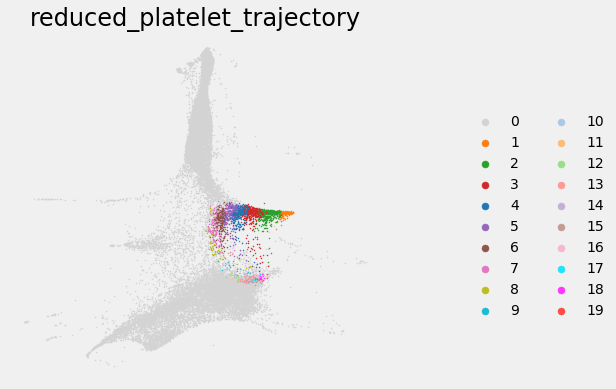

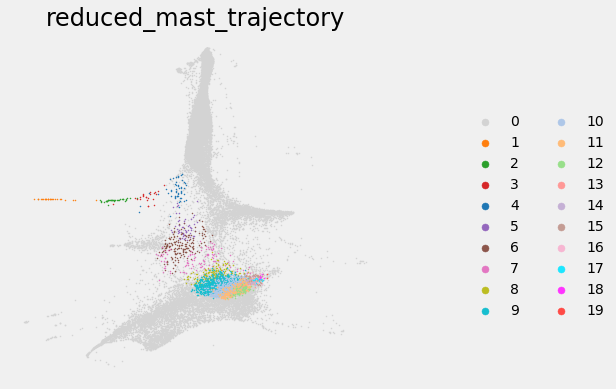

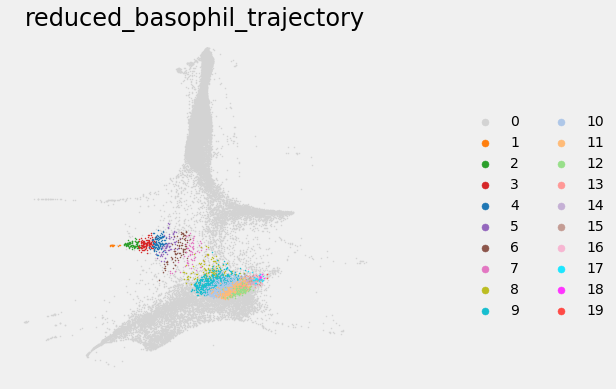

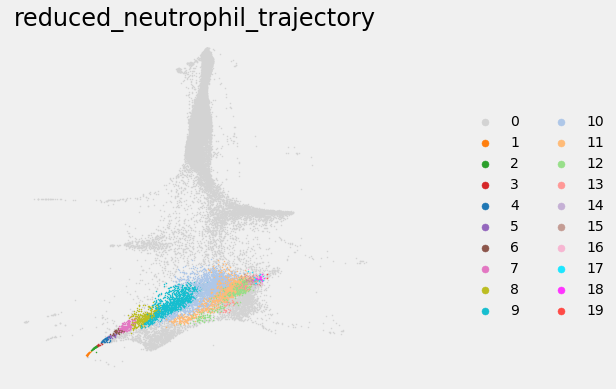

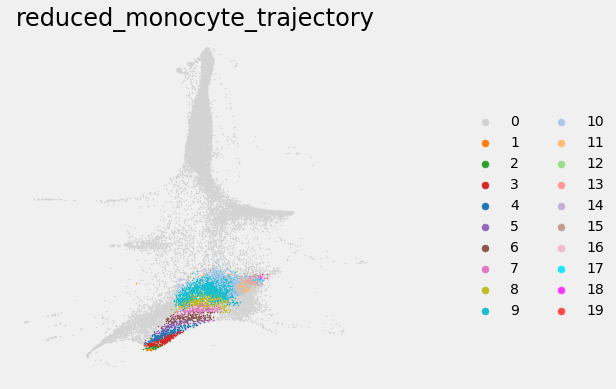

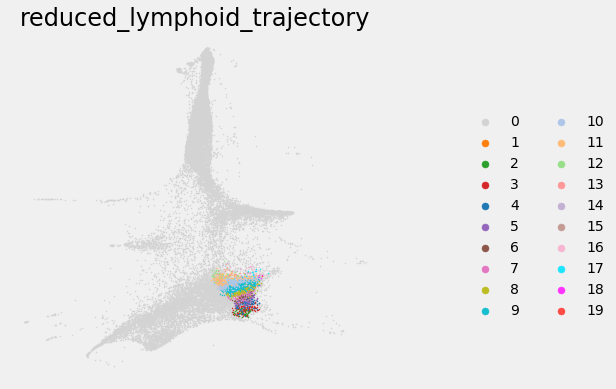

In [13]:
titans.combine.reduce_trajectories(titans_object, traj_list, k=20)
for item in traj_list:
    titans.plotting.visualise_trajectory(data.obsm['graph_coords'], titans_object, 'reduced_'+item)

Finally, we can combine our 7 trajectories to get an overall picutre of **which cells belong to which trajectories**:

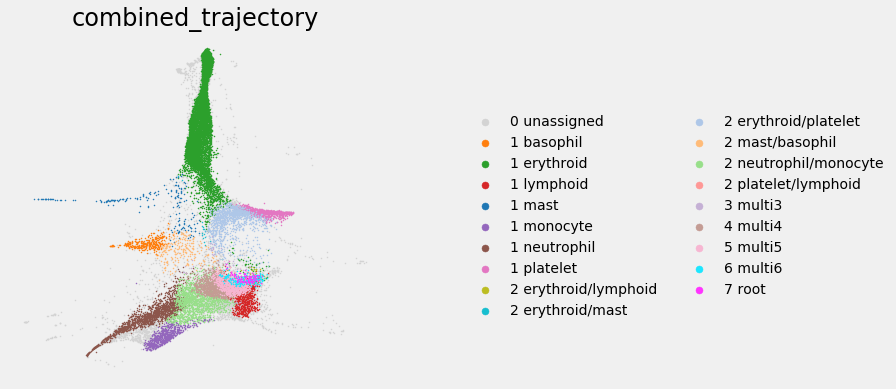

Identiy of cells belonging to 4 trajectories: 
 mast/basophil/neutrophil/monocyte    99.495459
erythroid/platelet/mast/lymphoid      0.403633
platelet/mast/basophil/lymphoid       0.100908
dtype: float64


Identiy of cells belonging to 5 trajectories: 
 mast/basophil/neutrophil/monocyte/lymphoid     97.278912
erythroid/mast/basophil/neutrophil/monocyte     2.448980
erythroid/platelet/mast/neutrophil/monocyte     0.136054
erythroid/platelet/mast/basophil/lymphoid       0.136054
dtype: float64


In [14]:
titans.combine.binarise_trajectories(titans_object, traj_list)
titans.combine.combine_trajectories(titans_object, traj_list)
titans.plotting.visualise_trajectory(data.obsm['graph_coords'], titans_object, 'combined_trajectory')
print('Identiy of cells belonging to 4 trajectories: \n', titans_object.multi4_counts)
print('\n')
print('Identiy of cells belonging to 5 trajectories: \n', titans_object.multi5_counts)

The pink cells in cluster '7 root' are those that belong to all 7 trajectories - **these are our blood stem cells**! Similarly, we can see which cells only belong to one trajectory, two trajectories etc. This result allows us to **reconstruct the decision-making process a blood stem cell goes through**. A very cool result!

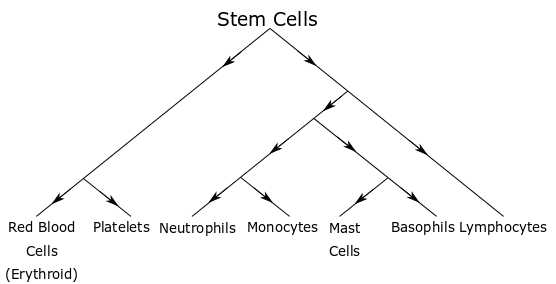

In [15]:
from PIL import Image
image = Image.open('blood_hierarchy.png')
image